In [1]:
'''
function that filters through the spreadsheet to find files that
correspond to the same probe and wavelength

'''

%matplotlib qt5
import rugpeek_functions as rp
import matplotlib.pyplot as plt
import numpy as np
import lmfit as lf
import matplotlib as mpl
import matplotlib.colors as colors
import sys
import pandas as pd
import re
import pprint

excel_data = pd.read_excel('Aarhus_Campaign_Jan_2024.xlsx', sheet_name=None)

sheet_names = excel_data.keys()
print(sheet_names)

#sheet2 = excel_data['Log']
#print(sheet2)

Log = pd.read_excel('Aarhus_Campaign_Jan_2024.xlsx', sheet_name='Log', skiprows=2)

filenames = Log['Filename']
#print(filenames)

list_of_files = []


for f in filenames:
    splitted = f.split('_')
    list_of_files.append(splitted)
    

#print(list_of_files) 
#^ this is as a list

allfiles = []

re.containsA = re.compile('nm|SHG')
re.containsB = re.compile('nm|FUN')
every_single_waveSHG =[]
every_single_waveFUN =[]

for file in list_of_files:
    for words in file:
        if re.containsA.match(words):
            #print('yesss', words)
            every_single_waveSHG.append(words)
        if re.containsB.match(words):
            every_single_waveFUN.append(words)

#print('Every single wave', every_single_wave)

SHG = []
FUN = []
for shgs in every_single_waveSHG:
    if shgs not in SHG:
        SHG.append(shgs)

for funs in every_single_waveFUN:
    if funs not in FUN:
        FUN.append(funs)
#print('\nRemoved duplicates', waves, '\n')

matchedSHG = []
matchedFUN = []


listofstrings = []
for file in filenames:
    splitting = file.split('_')
    newstring = ' '.join(map(str, splitting))
    listofstrings.append(newstring)

#print('\nNewstring:', listofstrings)

            
for s in SHG:
    for file in listofstrings:
        if (s in file):
            matchedSHG.append(file)
        
for f in FUN:
    for file in listofstrings:
        if (f in file):
            matchedFUN.append(file)
            
#print('matchedSHG', matchedSHG)
#print('\nmatchedFUN', matchedFUN)

SHG_listofstrings = []
for file in matchedSHG:
    SHG_listofstrings.append(file)
    
FUN_listofstrings = []
for file in matchedFUN:
    FUN_listofstrings.append(file)

#print('\nSHG strings',SHG_listofstrings)
#print('\nFUN strings',FUN_listofstrings)

newSHG_list = []
newFUN_list = []

for strings in SHG_listofstrings:
    s = strings.replace(' ', '_')
    newSHG_list.append(s)

for strings in FUN_listofstrings:
    s = strings.replace(' ', '_')
    newFUN_list.append(s)
    
#print('newfun list', newFUN_list)
SHGlist_spaces = []
FUNlist_spaces = []

for s in newSHG_list:
    splitted = s.split('_')
    SHGlist_spaces.append(splitted)
    
for f in newFUN_list:
    splitted = f.split('_')
    FUNlist_spaces.append(splitted)
    
every_single_waveSHG =[]
every_single_waveFUN =[]
re.containsZ = re.compile(r'.*nm.*')

for file in SHGlist_spaces:
    for words in file:
        if re.containsZ.match(words):
            every_single_waveSHG.append(words)

#print(FUNlist_spaces)
for file2 in FUNlist_spaces:
    #print(file2)
    for words in file2:
        if re.containsZ.match(words):
            every_single_waveFUN.append(words)

wavesSHG = []
wavesFUN = []

for wave in every_single_waveSHG:
    if wave not in wavesSHG:
        wavesSHG.append(wave)
        
for wave in every_single_waveFUN:
    if wave not in wavesFUN:
        wavesFUN.append(wave)
        
matchedSHG = {w: [] for w in wavesSHG}
matchedFUN = {w: [] for w in wavesFUN}

for wave in wavesSHG:
    for file in SHGlist_spaces:
        if (wave in file):
            string = ""
            for item in file:
                string = string + item+"_"
    
            string = string + "matrix"
            matchedSHG[wave].append(string)
            
for wave2 in wavesFUN:
    for file2 in FUNlist_spaces:
        if (wave2 in file2):
            matchedFUN[wave2].append(file2)
        
            
#print('all waves', every_single_wave)

#print('removed duplicates', wavesSHG)

#print('\nmatched SHG', matchedSHG)

#pprint.pprint(matchedSHG)
#pd.DataFrame(matchedSHG.items())
#x = pd.DataFrame.from_dict(matchedSHG, orient='index')
#print(x)
#print('\nmatched FUN', matchedFUN)

print('SHG\n')
pprint.pprint(matchedSHG)


print('\nFUN:\n')
pprint.pprint(matchedFUN)

dict_keys(['Packing List', 'Log', 'Overview', 'Sheet6', 'Misc', 'Sample prep'])
SHG

{'240nm': ['oxygenrelease_1mM_240nm_SHG_TA_1_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_2_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_3_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_1_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_2_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_3_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_4_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_5_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_6_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_7_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_8_matrix',
           'oxygenrelease_1mM_240nm_SHG_TA_9_matrix',
           'milliQ_240nm_SHG_chirp_1_matrix'],
 '304nm': ['milliQ_304nm_SHG_chirp_1_matrix'],
 '305nm': ['oxygenrelease_1mM_305nm_SHG_TA_1_matrix',
           'oxygenrelease_1mM_305nm_SHG_TA_2_matrix',
           'oxygenrelease_1mM_305nm_SHG_TA_3_matrix',
           

In [ ]:
'''
I think it unzips everything here and the folders within the zip
should then appear in your directory

attached an image below of what shows up

'''

import glob
import re
from zipfile import ZipFile

zipfile = glob.glob('*zip')
print(zipfile)

filelist = glob.glob('*.dat')

zips = [] 
with ZipFile('aarhus_TA_jan24.zip', 'r') as zipObj:
    for entry in zipObj.infolist():
        #print(entry.filename)
        zips.append(entry.filename)  

#print(zips) #every thing in the zip folder- even the folders within it


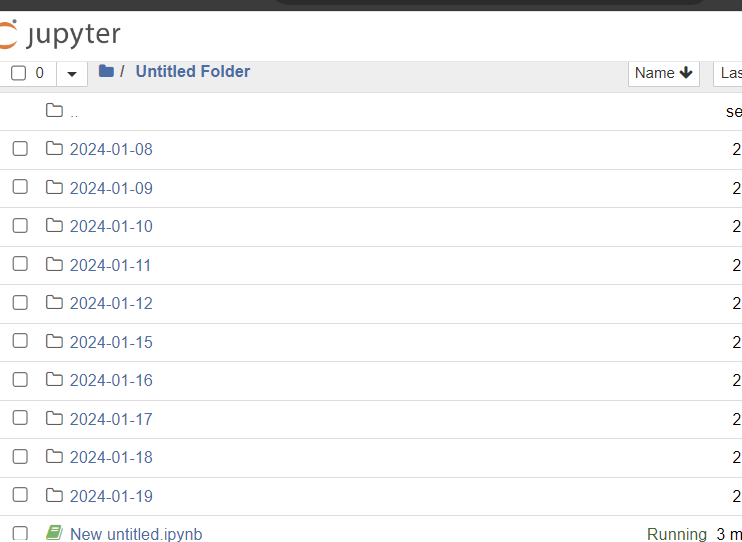

In [20]:

data = (matchedSHG['240nm'])
print(data)
rp.Rug.auto_processing(data)

['oxygenrelease_1mM_240nm_SHG_TA_1_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_2_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_3_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_1_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_2_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_3_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_4_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_5_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_6_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_7_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_8_matrix', 'oxygenrelease_1mM_240nm_SHG_TA_9_matrix', 'milliQ_240nm_SHG_chirp_1_matrix']


FileNotFoundError: [Errno 2] No such file or directory: 'milliQ_240nm_SHG_chirp_1_matrix.dat'

In [9]:
'''
Another extraction function I was looking at 

'''
import zipfile
import os

with zipfile.ZipFile('aarhus_TA_jan24.zip', "r") as zf:
        for name in zf.namelist():
            localFilePath = zf.extract(name, '')
            if os.path.isdir(localFilePath):
                continue
            print(localFilePath)
            

2024-01-08\Mb_impure_1_TA_1.dat
2024-01-08\Mb_impure_1_TA_2.dat
2024-01-08\Mb_impure_1_TA_3.dat
2024-01-18\Haem_360nm_FUN_TA_2.dat
2024-01-18\Haem_360nm_SHG_TA_3.dat
2024-01-18\Haem_360nm_FUN_TA_1.dat
2024-01-18\Haem_360nm_SHG_TA_1.dat
2024-01-18\Haem_360nm_SHG_TA_2.dat
2024-01-18\Haem_385nm_FUN_TA_1.dat
2024-01-18\Haem_385nm_SHG_TA_1.dat
2024-01-18\Haem_385nm_SHG_TA_2.dat
2024-01-18\Haem_385nm_SHG_TA_3.dat
2024-01-08\Mb_impure_100um_409nm.dat
2024-01-08\Mb_impure_1_TA_1_stats.dat
2024-01-08\Mb_impure_1_TA_2_stats.dat
2024-01-08\Mb_impure_1_TA_3_stats.dat
2024-01-19\Haem-CYS_371nm_FUN_TA_1.dat
2024-01-19\Haem-CYS_371nm_FUN_TA_2.dat
2024-01-19\Haem-CYS_371nm_FUN_TA_3.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_4.dat
2024-01-19\Haem-CYS_371nm_FUN_TA_4.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_2.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_3.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_5.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_1.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_6.dat
2024-01-19\Haem-CYS_371nm_SHG_TA_7.dat
2024-01-1

In [28]:
'''
function that loops through the matchedshg['240nm'] files, makes the
name a keyword to search and then loops through the subfolder files to
see if they match up. If they do match up then the autoprocessing should
run. Doesn't work :p

I thought this would get around the issue of the files from the
subfolders not being found but I think it's something else that's
causing the problem.

'''
filelist = glob.glob('*.dat')
files_in_subfolders = glob.glob('**/*.dat')

#print(files_in_subfolders)

data = (matchedSHG['240nm'])
for i in data: ####### looks at each file
    filefinder = "r'.*" + i + ".*'" ## puts the special charcacters
    re.containsi = re.compile(filefinder) 
    for files in files_in_subfolders:
        if re.containsi.match(file): #if it contains the same name as the 
            rp.Rug.auto_processing(file)

TypeError: expected string or bytes-like object